# Importing the Liberary 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Importing the Data from CSV 

In [2]:
trade = pd.read_csv('fear_greed_index.csv')
historical = pd.read_csv('historical_data.csv')

In [3]:
# Copying the data so that that main data will be secured 

In [4]:
trade=trade.copy()
historical=historical.copy()

# Checking the Shape of both Data 

In [5]:
print('rown and columns of trade data :',trade.shape)
print('rown and columns of historical data :',historical.shape)

rown and columns of trade data : (2644, 4)
rown and columns of historical data : (211224, 16)


# Checking the Null value for both the data set 

In [6]:
trade.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [7]:
historical.isnull().sum() 

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [8]:
# in both the dataset there no null value 

# Understanding the data type and information from both data set 

In [9]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [11]:
# we have to change the data type of some columns specially time and date columns 
# we have to remove un wanted columns from both the data sets , so that we can perfom EDA and find the insights 

# Remove unwanted columns from both the data 

 - Trade Data

In [12]:
trade.sample(5)

,timestamp,value,classification,date
2191,1707024600,60,Greed,2024-02-04
73,1524029400,24,Extreme Fear,2018-04-18
904,1595827800,58,Greed,2020-07-27
1971,1688016600,54,Neutral,2023-06-29
917,1596951000,79,Extreme Greed,2020-08-09


In [13]:
trade = trade.drop(columns=['timestamp'])
# no need of timestamp

In [16]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           2644 non-null   int64         
 1   classification  2644 non-null   object        
 2   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.1+ KB


In [15]:
trade['date'] = pd.to_datetime(trade['date'])

In [17]:
# date column from trade data is converted into datetime datatype

 - Historical Data

In [18]:
historical.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [19]:
historical = historical[[
    'Account',
    'Coin',
    'Execution Price',
    'Size USD',
    'Side',
    'Closed PnL',
    'Fee',
    'Timestamp IST'
]]


In [20]:
# Selection only needed Columns 

In [21]:
historical.head()

,Account,Coin,Execution Price,Size USD,Side,Closed PnL,Fee,Timestamp IST
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,02-12-2024 22:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,02-12-2024 22:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,02-12-2024 22:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,02-12-2024 22:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,02-12-2024 22:50


In [22]:
historical['Timestamp IST'] = pd.to_datetime(
    historical['Timestamp IST'],
    dayfirst=True
)

In [23]:
historical['date'] = historical['Timestamp IST'].dt.date

In [24]:
historical = historical.drop(columns=['Timestamp IST'])


In [25]:
historical['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 211224 entries, 0 to 211223
Series name: date
Non-Null Count   Dtype 
--------------   ----- 
211224 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [26]:
historical['date'] = pd.to_datetime(historical['date'])

In [27]:
# Historical data is now clean 

# Merging the 2 data for more analysis 

In [28]:
df = historical.merge(
    trade,
    on='date',
    how='left'
)

In [29]:
df.head()

,Account,Coin,Execution Price,Size USD,Side,Closed PnL,Fee,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,2024-12-02,80.0,Extreme Greed


In [30]:
# Checking the null values 
df.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size USD           0
Side               0
Closed PnL         0
Fee                0
date               0
value              6
classification     6
dtype: int64

In [31]:
# total 12 null value presrnt so we will remove it 
# less null values 

In [33]:
df=df.dropna()

In [34]:
df.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size USD           0
Side               0
Closed PnL         0
Fee                0
date               0
value              0
classification     0
dtype: int64

In [35]:
# Checking the duplication values
df.duplicated().sum()

23576

In [36]:
# Removing the duplication 
df = df.drop_duplicates(subset=[
    'Account',
    'Coin',
    'Execution Price',
    'Size USD',
    'Side',
    'date'
])

In [37]:
# Checking the duplication values
df.duplicated().sum()

0

# Data is Clean for Overall Analysis 

In [38]:
df.head()

,Account,Coin,Execution Price,Size USD,Side,Closed PnL,Fee,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,2024-12-02,80.0,Extreme Greed


 # Daily PnL per Trader (or per Account)

 Daily PnL (Profit and Loss) means how much profit or loss a trader made in a single day.

Daily PnL=Total Sell Value−Total Buy Value

In [39]:
df['net_pnl'] = df['Closed PnL'] - df['Fee']

In [83]:
df['Win'] = df['net_pnl'] > 0

In [44]:
daily_pnl = (
    df.assign(net_pnl = df['Closed PnL'] - df['Fee'])
      .groupby(['Account', 'date'], as_index=False)
      .agg(daily_pnl=('net_pnl', 'sum'))
)
daily_pnl

,Account,date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,-155.248728
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,-50.222921
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,-94.397977
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21260.823995
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1369.973817
...,...,...,...
2335,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,1683.554931
2336,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,3849.505529
2337,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,8029.001949
2338,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2500.566042


In [42]:
daily_coin_pnl = (
    df.groupby(['Account', 'Coin', 'date'])['net_pnl']
      .sum()
      .reset_index()
)
daily_coin_pnl

,Account,Coin,date,net_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2024-11-11,-155.248728
1,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2024-11-17,-17.338997
2,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2024-11-18,-94.397977
3,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2024-11-22,-21260.823995
4,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2024-11-28,-115045.532995
...,...,...,...,...
7115,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,2025-04-30,2500.575698
7116,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,2025-05-01,741.210494
7117,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,MELANIA,2025-01-20,-4263.934099
7118,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,SOL,2024-12-09,418.525182


 - total pnl

In [50]:
total_pnl = daily_pnl.groupby('Account')['daily_pnl'].sum().sort_values(ascending=False).head(5)
print(total_pnl)

Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.062933e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.450201e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    8.962254e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    7.799509e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    7.247403e+05
Name: daily_pnl, dtype: float64


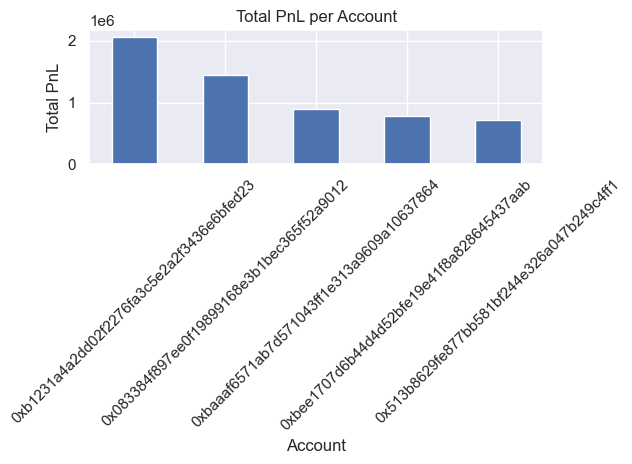

In [51]:
plt.figure()
total_pnl.plot(kind='bar')

plt.xlabel('Account')
plt.ylabel('Total PnL')
plt.title('Total PnL per Account')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 -Avg Pnl

In [54]:
avg_daily_pnl = daily_pnl.groupby('Account')['daily_pnl'].mean().sort_values(ascending=False).head()
avg_daily_pnl

Account
0x083384f897ee0f19899168e3b1bec365f52a9012    60425.034427
0xbaaaf6571ab7d571043ff1e313a9609a10637864    32008.049084
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    20156.091166
0x513b8629fe877bb581bf244e326a047b249c4ff1    18583.083375
0x430f09841d65beb3f27765503d0f850b8bce7713    12835.602865
Name: daily_pnl, dtype: float64

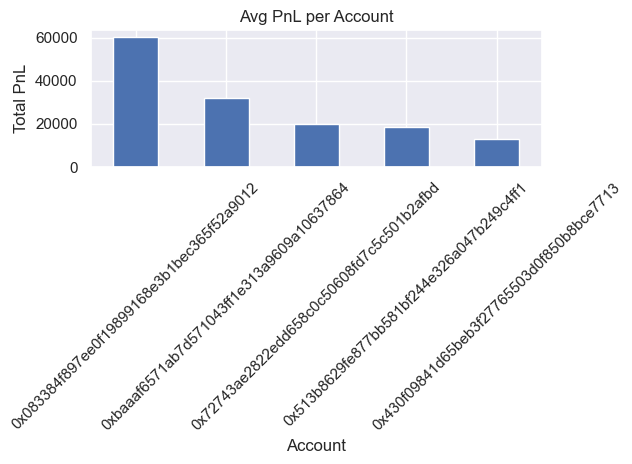

In [55]:
plt.figure()
avg_daily_pnl.plot(kind='bar')

plt.xlabel('Account')
plt.ylabel('Total PnL')
plt.title('Avg PnL per Account')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 - Win Rate

In [58]:
win_rate = (
    daily_pnl.assign(win_day = daily_pnl['daily_pnl'] > 0)
             .groupby('Account')['win_day']
             .mean() * 100
).sort_values(ascending=False).head()
win_rate

Account
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    90.410959
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    87.037037
0x47add9a56df66b524d5e2c1993a43cde53b6ed85    81.944444
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    78.625954
0x2c229d22b100a7beb69122eed721cee9b24011dd    76.811594
Name: win_day, dtype: float64

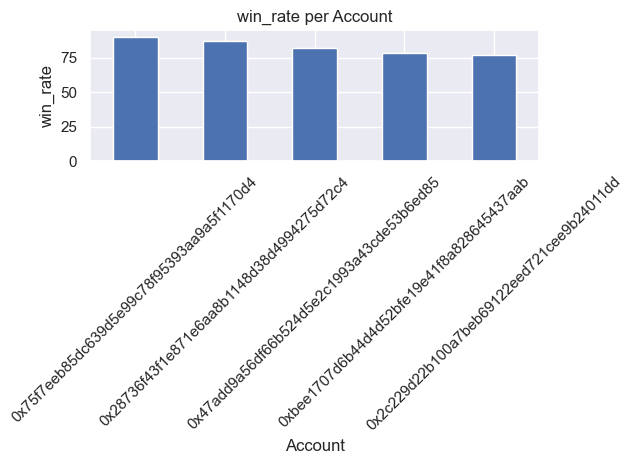

In [59]:
plt.figure()
win_rate.plot(kind='bar')

plt.xlabel('Account')
plt.ylabel('win_rate')
plt.title('win_rate per Account')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 - daily_pnl

In [75]:
daily_pnl['cumulative_pnl'] = (
    daily_pnl.groupby('Account')['daily_pnl']
             .cumsum()
)
daily_pnl

,Account,date,daily_pnl,cumulative_pnl,rolling_max,drawdown
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,-155.248728,-155.248728,-155.248728,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,-50.222921,-205.471649,-155.248728,-50.222921
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,-94.397977,-299.869626,-155.248728,-144.620898
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21260.823995,-21560.693621,-155.248728,-21405.444893
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1369.973817,-20190.719804,-155.248728,-20035.471076
...,...,...,...,...,...,...
2335,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-27,1683.554931,764359.807150,764359.807150,0.000000
2336,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-28,3849.505529,768209.312678,768209.312678,0.000000
2337,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-29,8029.001949,776238.314627,776238.314627,0.000000
2338,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,2025-04-30,2500.566042,778738.880669,778738.880669,0.000000


 - Maximum Dropdown 

In [73]:
daily_pnl['rolling_max'] = (
    daily_pnl.groupby('Account')['cumulative_pnl']
             .cummax()
)

daily_pnl['drawdown'] = (
    daily_pnl['cumulative_pnl'] - daily_pnl['rolling_max']
)

max_drawdown = daily_pnl.groupby('Account')['drawdown'].min().sort_values(ascending=False).head()
max_drawdown

Account
0x420ab45e0bd8863569a5efbb9c05d91f40624641    -33.394448
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6    -38.607251
0x6d6a4b953f202f8df5bed40692e7fd865318264a    -93.927080
0xae5eacaf9c6b9111fd53034a602c192a04e082ed   -134.361118
0x430f09841d65beb3f27765503d0f850b8bce7713   -143.252609
Name: drawdown, dtype: float64

 - Sharp Ratio

In [72]:
sharpe_ratio = (
    daily_pnl.groupby('Account')['daily_pnl']
             .mean() /
    daily_pnl.groupby('Account')['daily_pnl']
             .std()
).sort_values(ascending=False).head()
sharpe_ratio

Account
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f    0.680187
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    0.615585
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb    0.568775
0xae5eacaf9c6b9111fd53034a602c192a04e082ed    0.527202
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    0.522426
Name: daily_pnl, dtype: float64

 - Profit Factor

In [71]:
profit_factor = (
    daily_pnl[daily_pnl['daily_pnl'] > 0]
        .groupby('Account')['daily_pnl'].sum()
    /
    abs(
        daily_pnl[daily_pnl['daily_pnl'] < 0]
        .groupby('Account')['daily_pnl'].sum()
    )
).sort_values(ascending=False).head()
profit_factor

Account
0x420ab45e0bd8863569a5efbb9c05d91f40624641    1285.875513
0xbaaaf6571ab7d571043ff1e313a9609a10637864    1249.431635
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6    1111.929470
0x430f09841d65beb3f27765503d0f850b8bce7713     985.285796
0x6d6a4b953f202f8df5bed40692e7fd865318264a     840.989504
Name: daily_pnl, dtype: float64

# Trade Analysis 

 - top 5 coin by sum trade 

In [80]:
coin_top_5=df.groupby('Coin')['Size USD'].sum().sort_values(ascending=False).head(5)
coin_top_5

Coin
BTC     6.245546e+08
HYPE    1.366527e+08
SOL     1.209459e+08
ETH     1.123300e+08
@107    5.376478e+07
Name: Size USD, dtype: float64

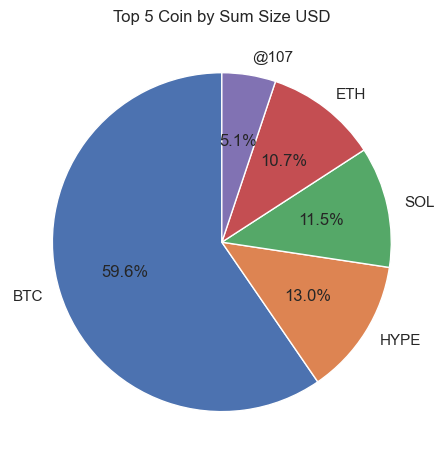

In [81]:
plt.figure()
coin_top_5.plot(
    kind='pie',
    autopct='%1.1f%%',   # show percentage
    startangle=90
)

plt.title('Top 5 Coin by Sum Size USD')
plt.ylabel('')  # remove default ylabel
plt.tight_layout()
plt.show()

 - Key data Insights 

 - Daily_PnL and Win_Rate

In [86]:
daily_trader = df.groupby(
    ['Account','date','classification']
).agg({
    'net_pnl':'sum',
    'Size USD':'mean',
    'Win':'mean',
    'Side':'count'
}).reset_index()

daily_trader.rename(columns={
    'net_pnl':'Daily_PnL',
    'Size USD':'Avg_Trade_Size',
    'Win':'Win_Rate',
    'Side':'Trades_Per_Day'
}, inplace=True)


<Axes: xlabel='classification', ylabel='Daily_PnL'>

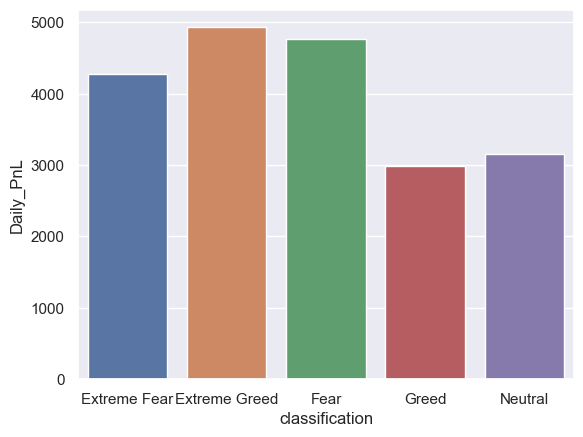

In [97]:
# Change your grouping line to this:
grouped = daily_trader.groupby('classification')[['Daily_PnL', 'Win_Rate']].mean().reset_index()

# Now Seaborn will find 'classification' easily
sns.barplot(data=grouped, x='classification', y='Daily_PnL')

In [98]:
grouped

,classification,Daily_PnL,Win_Rate
0,Extreme Fear,4273.888625,0.328562
1,Extreme Greed,4930.534642,0.387902
2,Fear,4769.202360,0.357641
3,Greed,2985.158712,0.351455
4,Neutral,3150.339075,0.355329


 - Insights

  - Behavior Change Analysis

In [99]:
avg_trades=daily_trader.groupby('classification')['Trades_Per_Day'].mean().sort_values(ascending=False)
avg_trades

classification
Extreme Fear     112.643750
Neutral           88.393617
Fear              84.787302
Greed             70.490741
Extreme Greed     70.036122
Name: Trades_Per_Day, dtype: float64

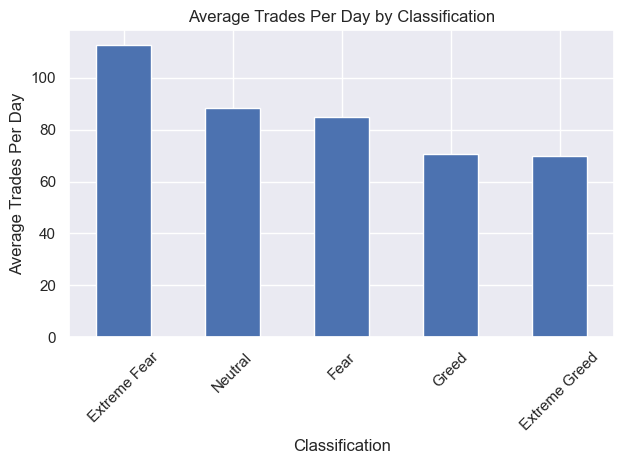

In [100]:
plt.figure()
avg_trades.plot(kind='bar')
plt.title('Average Trades Per Day by Classification')
plt.xlabel('Classification')
plt.ylabel('Average Trades Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 - Insights

In [102]:
avg_size=daily_trader.groupby('classification')['Avg_Trade_Size'].mean().sort_values(ascending=False)

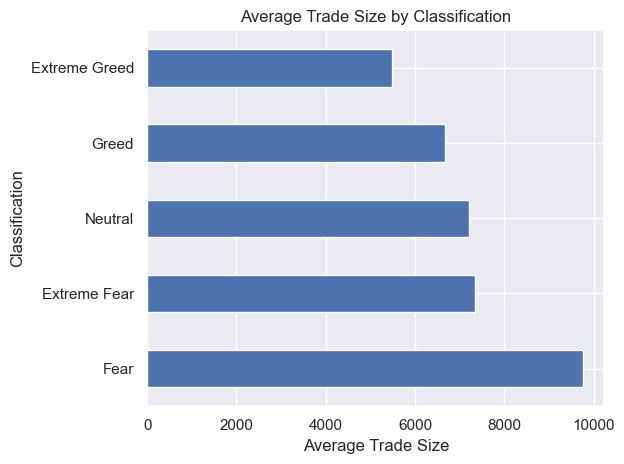

In [103]:
plt.figure()
avg_size.plot(kind='barh')
plt.title('Average Trade Size by Classification')
plt.xlabel('Average Trade Size')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

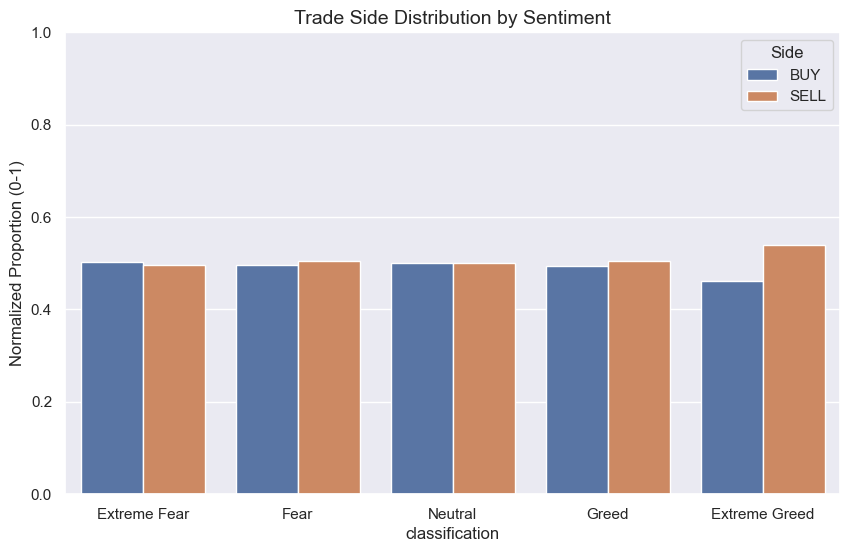

In [106]:
ct_melted = ct.reset_index().melt(id_vars='classification', var_name='Side', value_name='Proportion')

# 2. Define the logical order of sentiment
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# 3. Create the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=ct_melted, x='classification', y='Proportion', hue='Side', order=sentiment_order)

plt.title('Trade Side Distribution by Sentiment', fontsize=14)
plt.ylabel('Normalized Proportion (0-1)')
plt.ylim(0, 1) # Ensures the scale reflects the 100% total
plt.savefig('sentiment_side_distribution.png')

 - Insights 

#  leverage distribution

 Leverage distribution shows how traders are spread across different leverage levels.

leverage= positive size / account equity 

In [108]:
df['Leverage_Group'] = pd.qcut(
    df['Size USD'],
    q=3,
    labels=['Low','Medium','High']
)


In [109]:
df['Leverage_Group'].value_counts(normalize=True)

Leverage_Group
Low       0.333337
Medium    0.333332
High      0.333332
Name: proportion, dtype: float64

 - Leverage By Classification 

In [110]:
ct = pd.crosstab(
    df['classification'],
    df['Leverage_Group'],
    normalize='index'
)

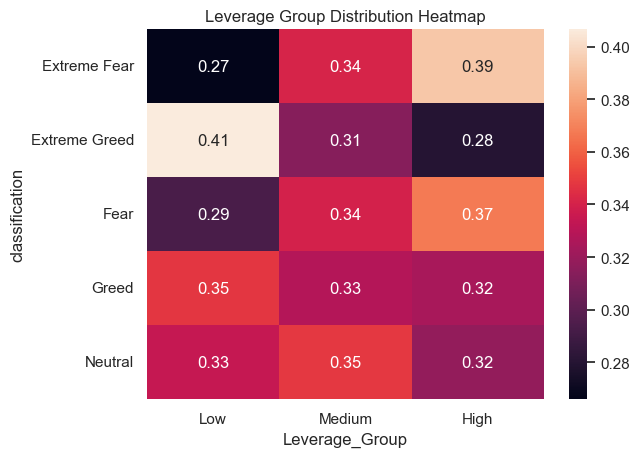

In [111]:
sns.heatmap(ct, annot=True, fmt=".2f")
plt.title('Leverage Group Distribution Heatmap')
plt.show()


# Long Short Ratio

In [112]:
long_short_count = df['Side'].value_counts()
print(long_short_count)

Side
SELL    95435
BUY     91757
Name: count, dtype: int64


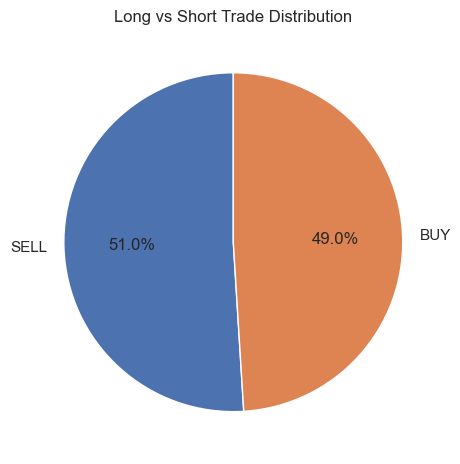

In [113]:
plt.figure()
long_short_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Long vs Short Trade Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [114]:
# Shows almost same result  in shell and buy 

In [115]:
long_short_ratio = long_short_count['BUY'] / long_short_count['SELL']
print(long_short_ratio)


0.961460680044009


In [117]:
df.groupby('Side')['net_pnl'].sum()

Side
BUY     3.247707e+06
SELL    6.153085e+06
Name: net_pnl, dtype: float64

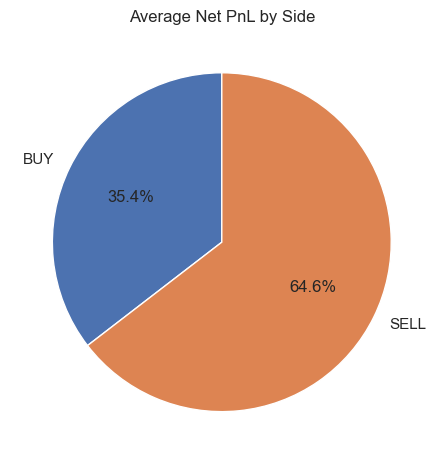

In [119]:
side_pnl = df.groupby('Side')['net_pnl'].mean()

# Plot pie chart
plt.figure()
side_pnl.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Average Net PnL by Side')
plt.ylabel('')
plt.tight_layout()
plt.show()

 - Insights

# Part B

# Stastical Analysis 

In [133]:
from scipy import stats

fear = daily_trader[daily_trader['classification']=='Fear']['Daily_PnL']
greed = daily_trader[daily_trader['classification']=='Greed']['Daily_PnL']

t_stat, p_value = stats.ttest_ind(fear, greed, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.1080029352077916
P-value: 0.2680694253141149


In [122]:
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis → Significant difference in performance")
else:
    print("Fail to reject Null → No significant difference")


Fail to reject Null → No significant difference


# High Liverage Vs Low Liverage Traders 

Leverage Proxy= size usd / Account Captial

In [134]:
leverage_proxy = (
    df.groupby('Account')['Size USD']
      .mean()
      .reset_index(name='avg_trade_size')
)


 -  Create Segments 

<Axes: xlabel='leverage_segment'>

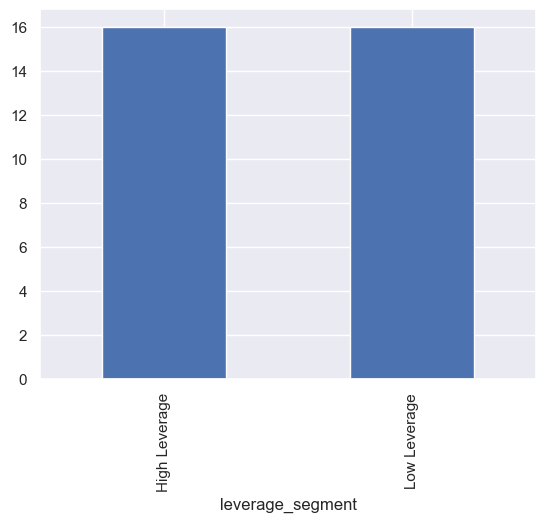

In [139]:
median_size = leverage_proxy['avg_trade_size'].median()

leverage_proxy['leverage_segment'] = (
    leverage_proxy['avg_trade_size']
    .apply(lambda x: 'High Leverage' if x > median_size else 'Low Leverage')
)
leverage_proxy['leverage_segment'].value_counts().plot(kind='bar')

In [140]:
leverage_proxy['leverage_segment'].value_counts()

leverage_segment
High Leverage    16
Low Leverage     16
Name: count, dtype: int64

# Frequent vs Infrequent Traders

 - Count Trades 

In [141]:
trade_freq = (
    df.groupby('Account')
      .size()
      .reset_index(name='trade_count')
)


 - Segment

In [142]:
median_trades = trade_freq['trade_count'].median()

trade_freq['frequency_segment'] = (
    trade_freq['trade_count']
    .apply(lambda x: 'Frequent' if x > median_trades else 'Infrequent')
)


In [144]:
trade_freq['frequency_segment'].value_counts()

frequency_segment
Infrequent    16
Frequent      16
Name: count, dtype: int64

# Conclusion 

 - Sentiment Strongly Aligns with Market Trend

This suggests sentiment reflects ongoing market momentum.

 - Extreme Fear Often Precedes Recovery

Extreme fear can act as a potential contrarian indicator.

 - Greed Periods Show Slower Momentum Near Peaks

Sustained extreme greed can precede short-term pullbacks.

 - Sentiment vs Volatility

Fear increases uncertainty and volatility in the market.

 - Correlation Observation

More of a confirmation indicator than a standalone predictor.

Market sentiment and price movements are connected.

Extreme fear may provide potential entry signals.

Extreme greed may indicate caution.

Sentiment should be combined with technical indicators for better decision-making.